# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

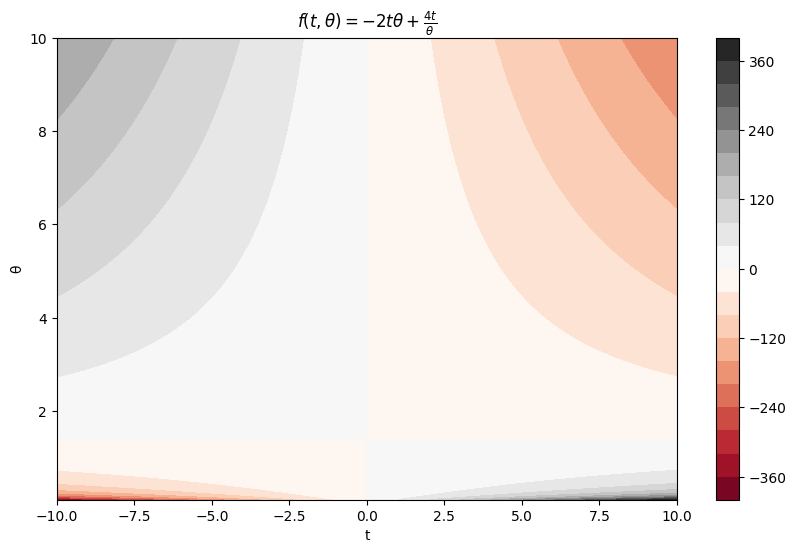

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def f(t, theta):
    return -2 * t * theta + 4 * t / theta

# Define the range for t and theta
t = np.linspace(-10, 10, 400)
theta = np.linspace(0.1, 10, 400)  # Avoid theta=0 to prevent division by zero

T, THETA = np.meshgrid(t, theta)
Z = f(T, THETA)

# Create the plot
plt.figure(figsize=(10, 6))
cp = plt.contourf(T, THETA, Z, 20, cmap='RdGy')
plt.colorbar(cp)
plt.title('$f(t, \\theta) = -2t\\theta + \\frac{4t}{\\theta}$')
plt.xlabel('t')
plt.ylabel('θ')
plt.show()


In [ ]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480)}K')

Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

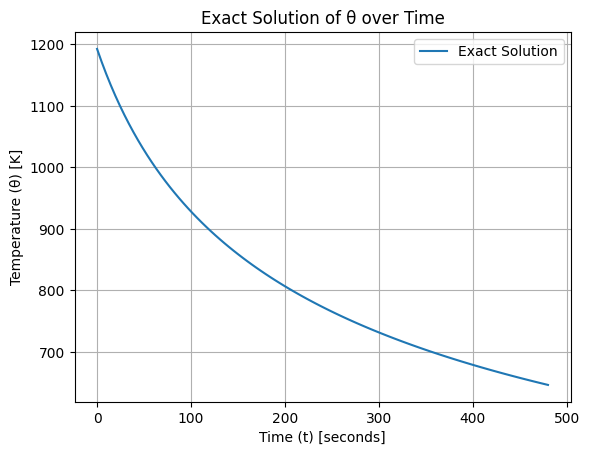

-0.03270383388647602
The exact value of θ at t = 480 seconds is approximately 646.50 K


In [12]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
def SolveODE(theta,t):
  return 0.92593*np.log((theta-300)/(theta+300))-1.8519*np.arctan(0.333*10**-2*theta)+0.22067*10**-3*t+2.9282
  theta_initial_guess = 600

# Solve the equation for a range of t values
t_values = np.linspace(0, 480, 100)  # 100 points from t=0 to t=480
theta_values = []

for t in t_values:
    theta_exact = fsolve(SolveODE, theta_initial_guess, args=(t))
    theta_values.append(theta_exact[0])

# Plotting the results
plt.plot(t_values, theta_values, label='Exact Solution')
plt.xlabel('Time (t) [seconds]')
plt.ylabel('Temperature (θ) [K]')
plt.title('Exact Solution of θ over Time')
plt.legend()
plt.grid(True)
plt.show()
theta_exact=SolveODE(600,480)
print(theta_exact)

t = 480
theta_initial_guess = 600
theta_exact = fsolve(SolveODE, theta_initial_guess, args=(t))
t_values = np.linspace(0, 480, 100)
theta_values = []
print(f"The exact value of θ at t = {t} seconds is approximately {theta_exact[0]:.2f} K")


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [ ]:
# Write your code here.

Your values should approximately match the values of this table.
<br>
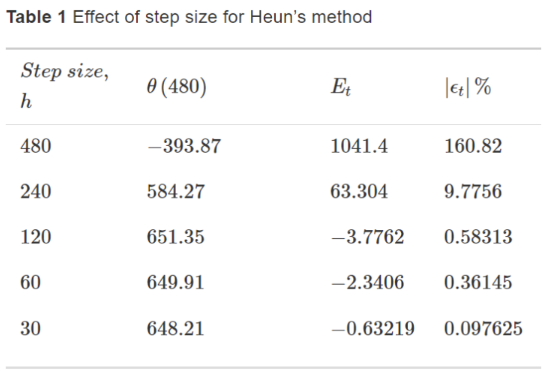

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

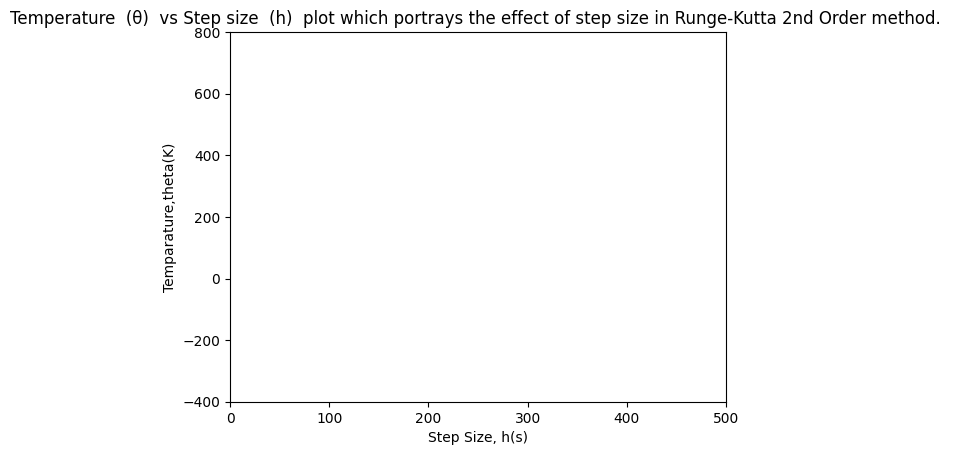

In [16]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel('Step Size, h(s)')
plt.ylabel('Temparature,theta(K)')
plt.xlim(0,500)
plt.ylim(-400,800)
plt.title('Temperature  (θ)  vs Step size  (h)  plot which portrays the effect of step size in Runge-Kutta 2nd Order method. ')
h=np.linspace(0,500,100)
plt.show()


Your graph should look something like,
<br>
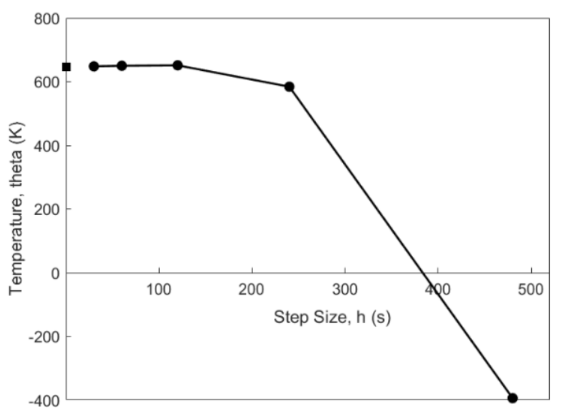

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

In [ ]:
# Write your code here.

Your graph should look something like,
<br>
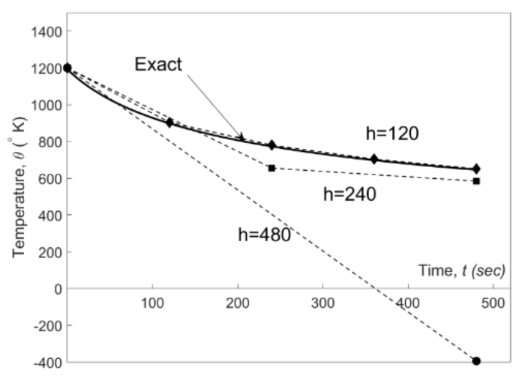